In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist


In [0]:
#from tensorflow.examples.tutorials.mnist import mnist

In [0]:
(x_train, train_labels),(x_test, test_labels) = mnist.load_data()


In [35]:
 print (x_train.shape)

(60000, 28, 28)


In [37]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Visualise the mnsit dataset

In [41]:
x_train[2900]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

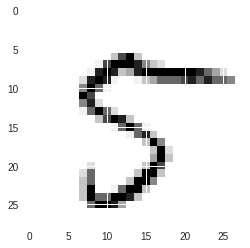

In [42]:
plt.imshow(x_train[2900])

#Create the model

In [0]:
x = tf.placeholder(tf.float32,shape=[None,784]) #Data

In [0]:
W = tf.Variable(tf.zeros([784,10]))#Weights

In [0]:
b = tf.Variable(tf.zeros([10]))#Biases

In [0]:
y = tf.matmul(x,W) + b

In [0]:
y_true = tf.placeholder(tf.float32, shape=[None,10])

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.7)

In [0]:
train = optimizer.minimize(cross_entropy)

Create the session

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  for step in range(1000):
    batch_x, batch_y = mnist.train.next_batch(100)
    sess.run(train,feed_dict=(x:batch_x, y_true:batch_y))
    
  matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
  
  acc = tf.reduce_mean(tf.cast(matches,tf.float32))
  
  print(sess.run(acc,feed_dict=(x:x_test,y_true:test_labels)))